In [1]:
print('Ritu')

Ritu


In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import re
import gensim.downloader as api
from gensim.models import Word2Vec, KeyedVectors
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report



In [4]:
wv = api.load('word2vec-google-news-300')
vecKing = wv['king']

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [5]:
vecKing

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [11]:
df = pd.read_csv('SMSSpamCollection',sep = '\t',names = ['label','message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.isna().sum()

,0
label,0
message,0


In [16]:
df.shape

(5572, 2)

In [25]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [38]:
corpus = []
lemma = WordNetLemmatizer()
for sent in df['message']:
  # print(sent)
  # text = re.sub('[^a-]')
  corpus.append([lemma.lemmatize(word) for word in simple_preprocess(re.sub('[^a-zA-Z]',' ',sent)) if word not in stopwords.words('english') ])
print(corpus)

[['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'la', 'buffet', 'cine', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'oni'], ['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'apply'], ['dun', 'say', 'early', 'hor', 'already', 'say'], ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'], ['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv'], ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'], ['per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'caller', 'press', 'copy', 'friend', 'callertune'], ['winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl', 'valid', 'hour'], ['mobile', 'month', 'entitled', 'update', 'latest', 'colour', 'm

In [39]:
len(corpus)

5572

In [40]:
len(df)

5572

In [41]:
[] in corpus

True

In [29]:
wv['king']


array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [49]:
sent_corpus = list(map(lambda x:' '.join(x),corpus))

In [51]:
sent_corpus[:3]

['go jurong point crazy available bugis great world la buffet cine got amore wat',
 'ok lar joking wif oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate apply']

In [53]:
len(sent_corpus),len(df)

(5572, 5572)

In [54]:
final_df = pd.DataFrame({'message':sent_corpus,'label':df.label})
final_df.head()

,message,label
0,go jurong point crazy available bugis great wo...,ham
1,ok lar joking wif oni,ham
2,free entry wkly comp win fa cup final tkts st ...,spam
3,dun say early hor already say,ham
4,nah think go usf life around though,ham


In [58]:
final_df = final_df[final_df['message'] != '']

In [59]:
final_df.shape

(5559, 2)

In [62]:
while [] in corpus:
  corpus.remove([])
print('ritu done')

ritu done


In [63]:
[] in corpus

False

In [64]:
len(corpus)

5559

In [65]:
Vmodel = Word2Vec(corpus,vector_size = 100,window = 5,min_count = 3,max_vocab_size = 10000)

In [66]:
Vmodel.wv.index_to_key

['call',
 'get',
 'ur',
 'gt',
 'lt',
 'go',
 'ok',
 'day',
 'free',
 'know',
 'come',
 'like',
 'good',
 'time',
 'got',
 'love',
 'text',
 'want',
 'send',
 'need',
 'one',
 'txt',
 'today',
 'going',
 'stop',
 'home',
 'lor',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'reply',
 'dont',
 'think',
 'tell',
 'week',
 'phone',
 'hi',
 'new',
 'please',
 'later',
 'pls',
 'co',
 'msg',
 'min',
 'make',
 'night',
 'dear',
 'message',
 'say',
 'well',
 'thing',
 'much',
 'oh',
 'claim',
 'great',
 'hope',
 'hey',
 'give',
 'number',
 'happy',
 'wat',
 'friend',
 'work',
 'yes',
 'way',
 'www',
 'prize',
 'let',
 'right',
 'tomorrow',
 'already',
 'tone',
 'said',
 'ask',
 'win',
 'life',
 'amp',
 'cash',
 'yeah',
 'im',
 'really',
 'meet',
 'babe',
 'find',
 'miss',
 'morning',
 'service',
 'thanks',
 'year',
 'uk',
 'last',
 'com',
 'anything',
 'would',
 'care',
 'also',
 'lol',
 'nokia',
 'feel',
 'every',
 'keep',
 'pick',
 'sure',
 'urgent',
 'sent',
 'contact',


In [163]:
Vmodel.corpus_count

(5559, 5559)

In [68]:
Vmodel.epochs

5

In [70]:
Vmodel.wv.similar_by_word('good')

[('amp', 0.9996538758277893),
 ('back', 0.9996506571769714),
 ('give', 0.9996423125267029),
 ('much', 0.9996373653411865),
 ('keep', 0.9996318817138672),
 ('last', 0.9996294379234314),
 ('night', 0.999627411365509),
 ('thing', 0.9996261596679688),
 ('like', 0.9996252655982971),
 ('got', 0.9996237754821777)]

In [72]:
len(corpus),len(final_df)

(5559, 5559)

In [74]:
corpus[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [108]:
def avg_vector(doc):

  return np.mean([Vmodel.wv[word] for word in doc if word in Vmodel.wv.index_to_key],axis = 0)


In [176]:
# len(avg_vector(corpus[0]))
# avg_vector(corpus[0])


# X = [avg_vector(doc).reshape(1,-1) for doc in corpus]
# X = [avg_vector(corpus[0])  ]

X = list(map(lambda x:avg_vector(x),corpus))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [134]:
X


[array([[-0.140489  ,  0.2540565 ,  0.13754569,  0.07133795,  0.08518858,
         -0.432823  ,  0.10161266,  0.5837958 , -0.15152846, -0.14103332,
         -0.20618282, -0.37753153, -0.03557856,  0.07821184,  0.03638966,
         -0.22093274,  0.02871494, -0.35089186, -0.04706267, -0.46407202,
          0.18280226,  0.07225514,  0.11246318, -0.15289766, -0.0820028 ,
         -0.02311067, -0.21890607, -0.2054732 , -0.2565757 ,  0.0789196 ,
          0.3042805 , -0.01859499,  0.08324755, -0.09940054, -0.09384439,
          0.28336012,  0.09235194, -0.19137673, -0.15897812, -0.5166505 ,
         -0.00464986, -0.28483146, -0.08582321,  0.03128061,  0.21591572,
         -0.11679406, -0.19652271, -0.05315175,  0.18746948,  0.22830898,
          0.05043178, -0.22700267, -0.08598071,  0.00342003, -0.20942853,
          0.19942679,  0.16720094, -0.0405308 , -0.20808555,  0.04855703,
          0.08783047,  0.15391557, -0.05601306, -0.04577765, -0.3887804 ,
          0.23618226,  0.0945567 ,  0.

In [143]:
len(X[0])

100

In [179]:
drop_index = []
for i in range(len(X)):
  if type(X[i]) == np.float64:
    print(i,X[i],corpus[i])
    drop_index.append(i)
    X[i] = []

73 nan ['performed']
303 nan ['womdarfull', 'actor']
450 nan ['hank', 'lotsly']
508 nan ['significance']
782 nan ['beerage']
804 nan ['dled', 'imp']
887 nan ['unbelievable', 'faglord']
891 nan ['nutter', 'cutter', 'ctter', 'cttergg', 'cttargg', 'ctargg', 'ctagg', 'ie']
1034 nan ['blanket', 'sufficient', 'thx']
1183 nan ['annoying']
1360 nan ['dance', 'river']
1442 nan ['ducking', 'chinchilla']
1588 nan ['honeymoon', 'outfit']
1831 nan ['september']
1929 nan ['scratching']
1990 nan ['practising', 'curtsey']
2271 nan ['telly', 'brdget', 'jones']
2318 nan ['stalking']
2410 nan ['fps']
2438 nan ['donno', 'scorable']
2565 nan ['ultimately', 'tor', 'motive', 'tui', 'achieve', 'korli']
2631 nan ['tiwary', 'rcb', 'battle', 'bang', 'kochi']
2791 nan ['creep']
3264 nan ['raviyog', 'peripheral', 'bhayandar', 'east']
3340 nan ['reverse', 'cheating', 'mathematics']
3733 nan ['stitch', 'trouser']
3781 nan ['whore', 'unbelievable']
3845 nan ['rounder', 'required']
3989 nan ['continent']
4278 nan ['po

In [166]:
for i in ['nutter', 'cutter', 'ctter', 'cttergg', 'cttargg', 'ctargg', 'ctagg', 'ie']:
  print(i in Vmodel.wv.index_to_key)

False
False
False
False
False
False
False
False


In [178]:
drop_index

[73,
 303,
 450,
 508,
 782,
 804,
 887,
 891,
 1034,
 1183,
 1360,
 1442,
 1588,
 1831,
 1929,
 1990,
 2271,
 2318,
 2410,
 2438,
 2565,
 2631,
 2791,
 3264,
 3340,
 3733,
 3781,
 3845,
 3989,
 4278,
 4373,
 4471,
 4668,
 4793,
 5306,
 5384,
 5401]

In [184]:
counter = 0
for i in drop_index:
  X.pop(i-counter)
  counter +=1

In [186]:
for i in range(len(X)):
  if type(X[i]) == np.float64:
    print(i,X[i],corpus[i])

In [187]:
len(X)

5522

In [191]:
final_df.drop(index = drop_index,inplace = True)

In [192]:
final_df.shape

(5522, 3)

In [193]:
final_vector_df = pd.DataFrame(X)
final_vector_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.140489,0.254057,0.137546,0.071338,0.085189,-0.432823,0.101613,0.583796,-0.151528,-0.141033,...,0.313079,0.128444,-0.009513,0.093229,0.434751,0.364137,0.193695,-0.223042,0.181492,-0.074900
1,-0.090674,0.173583,0.092601,0.047503,0.056944,-0.298899,0.070527,0.396648,-0.102265,-0.095652,...,0.213272,0.089139,-0.007381,0.061998,0.298279,0.248824,0.133600,-0.156050,0.122481,-0.048250
2,-0.129079,0.231533,0.123040,0.069798,0.075764,-0.390540,0.090672,0.523575,-0.134395,-0.127784,...,0.278719,0.117956,-0.008763,0.085754,0.393669,0.332701,0.176539,-0.202255,0.164380,-0.070256
3,-0.191244,0.353229,0.188720,0.100086,0.115699,-0.601600,0.140492,0.807695,-0.210305,-0.191532,...,0.428101,0.177511,-0.007906,0.130462,0.608611,0.497149,0.269604,-0.302124,0.246177,-0.103987
4,-0.153613,0.286814,0.154439,0.078307,0.093391,-0.482178,0.116528,0.648132,-0.167705,-0.153201,...,0.348913,0.148598,-0.007029,0.102453,0.487977,0.407322,0.217217,-0.248022,0.202896,-0.078570


In [199]:
le = LabelEncoder()
y = le.fit_transform(final_df.label)
y

array([0, 0, 1, ..., 0, 0, 0])

In [201]:
X_train,X_test,y_train,y_test =train_test_split(final_vector_df,y,test_size = 0.23,random_state = 32001)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4251, 100)
(1271, 100)
(4251,)
(1271,)


In [202]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
y_pred = model.predict(X_test)


0.963808025177026


In [204]:
print(cross_val_score(RandomForestClassifier(),X_train,y_train,cv = 5))

[0.95887192 0.96823529 0.95176471 0.96352941 0.96705882]


<Axes: >

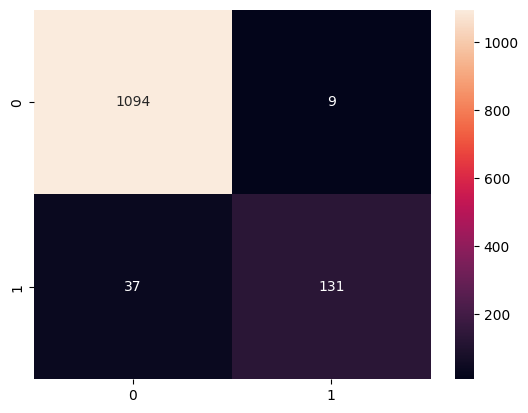

In [205]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

In [207]:
final_df.label.value_counts()

,count
label,
ham,4775
spam,747
